- Nama : Rajendra Artanto Wiryawan Sujana
- NIM : 21.11.4236
- Kelas : 21 IF 06

Proyek Data Mining 2

# Prediksi Penyakit Hepatitis C Virus 🩺

## Importing Libraries

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd  # Mengimpor Pandas untuk manipulasi data
import numpy as np  # Mengimpor NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi data
import seaborn as sns  # Mengimpor Seaborn untuk visualisasi data yang lebih menarik
import warnings  # Mengimpor Warnings untuk mengabaikan pesan peringatan
warnings.simplefilter("ignore")  # Mengabaikan pesan peringatan untuk kelancaran eksekusi

## Loading up the data

### Dataset Hepatitis C

| Category (diagnosis)         | Description                        |
|------------------------------|------------------------------------|
| 0 = Blood Donor              | Donor darah                        |
| 3 = Cirrhosis                | Penyakit hati stadium akhir        |
| 2 = Fibrosis                 | Jaringan paru fibrotik             |
| 1 = Hepatitis                | Peradangan hati                    |
| 0s = Suspect Blood Donor     | Dugaan donor darah                 |
|
| Age (Usia)                   | [32 - 77]                          |
| Sex (Jenis Kelamin)          | [m = Male, f = Female]             |
| ALB (jumlah albumin)         | [14,9 - 82,2]                      |
| ALP (jumlah alkaline phosphatase)| [11,3 - 416,6]               |
| ALT (jumlah alanin transaminase) | [0,9 - 325,3]               |
| AST (jumlah aspartat)        | [10,6 - 324]                       |
| BIL (jumlah bilirubin)       | [0,8 - 209]                        |
| CHE (jumlah kolinesterase)   | [1,42 - 16,41]                     |
| CHOL (jumlah kolesterol)     | [1,43 - 9,67]                      |
| CREA (jumlah kreatin)        | [8 - 1079,1]                       |
| GGT (jumlah gamma-glutamil-transferase) | [4,5 - 650,9]         |
| PROT (jumlah protein)        | [44,8 - 86,5]                      |


In [2]:
df = pd.read_csv('HepatitisCdata.csv')

In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Path ke file CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/SEMESTER 6/PROYEK DATA MINING/HepatitisCdata.csv'

# Menggunakan metode read_csv dari Pandas untuk memuat dataset dari file CSV di Google Drive
df = pd.read_csv(file_path)

# Tampilkan dataset untuk memastikan bahwa telah dimuat dengan benar
print(df.head())


   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [4]:
#df = pd.read_csv("HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
# Menghapus kolom "Unnamed: 0" dari dataframe
# axis=1 menunjukkan bahwa operasi penghapusan dilakukan pada kolom
# inplace=True menunjukkan bahwa operasi penghapusan dilakukan langsung pada dataframe tanpa membuat salinan baru
df.drop("Unnamed: 0", axis=1, inplace=True)


In [6]:
# Mendapatkan tipe data dari setiap kolom dalam dataframe (df)
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [7]:
# Mendapatkan nilai unik dari kolom 'Category' dalam dataframe (df)
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [8]:
# Mengubah nilai dalam kolom 'Category' sesuai dengan pemetaan yang diberikan:
# 0 = '0=Blood Donor' dan '0s=suspect Blood Donor'
# 1 = '1=Hepatitis', '2=Fibrosis', dan '3=Cirrhosis'
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis": 1, "2=Fibrosis": 1, "3=Cirrhosis": 1})

# Mengubah nilai dalam kolom 'Sex' sesuai dengan pemetaan yang diberikan:
# 'm' menjadi 1 dan 'f' menjadi 2
df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})


In [9]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
print(df)

     Category  Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32    1  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32    1  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32    1  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32    1  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32    1  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...   ...    ...    ...    ...   ...    ...   ...    ...   
610         1   62    2  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7   
611         1   64    2  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   
612         1   64    2  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   
613         1   46    2  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   
614         1   59    2  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  
0     12.1  69.0  
1

In [11]:
# Memeriksa kembali tipe data setelah transformasi
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [12]:
# Memeriksa nilai-nilai yang hilang dalam dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [13]:
# Mengisi nilai-nilai yang hilang dengan median dari setiap kolom
df.fillna(df.median(), inplace=True)

In [14]:
# Memeriksa kembali jumlah nilai-nilai yang hilang setelah pengisian dengan median
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

## Visualisasi Data

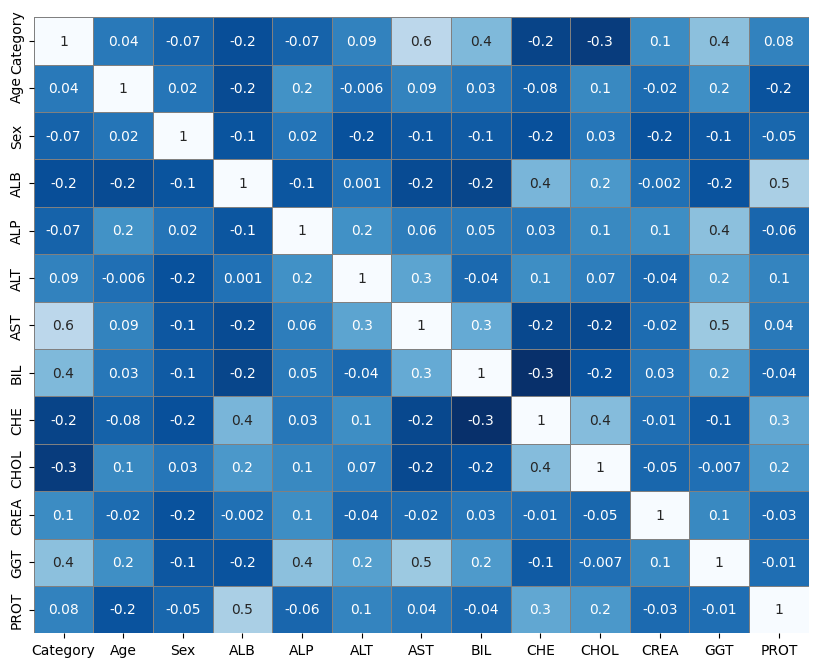

In [19]:
# Menampilkan matriks korelasi untuk dataset
# Ukuran gambar disetel menjadi 10x8
# Heatmap menggunakan warna dari skala 'Blues_r'
# Nilai-nilai korelasi ditampilkan sebagai anotasi pada heatmap
# Nilai-nilai dibulatkan ke satu angka desimal (fmt='.1g')
# Tidak ada color bar (cbar=False)
# Ketebalan dan warna garis pada heatmap diatur (linewidths=0.5, linecolor='grey')

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

Heatmap tersebut menggambarkan korelasi antar berbagai variabel dalam dataset terkait hepatitis C. Nilai korelasi berkisar dari -1 hingga 1, di mana:

- Nilai 1 menunjukkan korelasi positif sempurna.
- Nilai -1 menunjukkan korelasi negatif sempurna.
- Nilai 0 menunjukkan tidak ada korelasi. <br>
Berikut adalah interpretasi dari beberapa korelasi yang ada pada heatmap tersebut:

1. Age Category dan AST (0.6): Terdapat korelasi positif yang cukup kuat antara kategori umur dan AST. Ini menunjukkan bahwa seiring bertambahnya umur, nilai AST cenderung meningkat.

2. Age Category dan BIL (0.4): Terdapat korelasi positif sedang antara kategori umur dan bilirubin (BIL). Artinya, semakin tua seseorang, nilai bilirubinnya cenderung meningkat.

3. AST dan ALT (0.3): Terdapat korelasi positif sedang antara AST dan ALT, dua enzim hati. Ini berarti bahwa ketika AST meningkat, ALT cenderung ikut meningkat.

4. CREA dan GGT (0.5): Terdapat korelasi positif sedang antara kreatinin (CREA) dan gamma-glutamyl transferase (GGT), yang dapat menunjukkan adanya hubungan antara fungsi ginjal dan fungsi hati.

5. Sex dan CHE (-0.08): Terdapat korelasi negatif yang sangat lemah antara jenis kelamin dan CHE. Artinya, jenis kelamin hampir tidak mempengaruhi nilai CHE.

6. ALB dan PROT (0.5): Terdapat korelasi positif sedang antara albumin (ALB) dan protein total (PROT), yang logis karena albumin merupakan komponen utama dari protein serum.

Secara umum, korelasi yang lebih dekat ke 1 atau -1 menunjukkan hubungan yang lebih kuat antara dua variabel. Korelasi positif menunjukkan bahwa kedua variabel meningkat bersamaan, sementara korelasi negatif menunjukkan bahwa satu variabel meningkat sementara yang lain menurun. Korelasi yang mendekati 0 menunjukkan tidak adanya hubungan linier yang kuat antara variabel-variabel tersebut.

In [20]:
# Mencetak total pasien yang dicurigai
print('Total Pasien yang Dicurigai: {} '.format(df.Category.value_counts()[0]))

# Mencetak total pasien yang sehat
print('Total Pasien Sehat: {} '.format(df.Category.value_counts()[1]))


Total Pasien yang Dicurigai: 540 
Total Pasien Sehat: 75 


Keterangan : <br>
0=Blood Donor': Pasien adalah donor darah (sehat). <br>
0s=suspect Blood Donor': Pasien dicurigai sebagai donor darah yang mungkin tidak sehat. <br>
1=Hepatitis': Pasien menderita hepatitis.


menambahkan persentase / jumlah


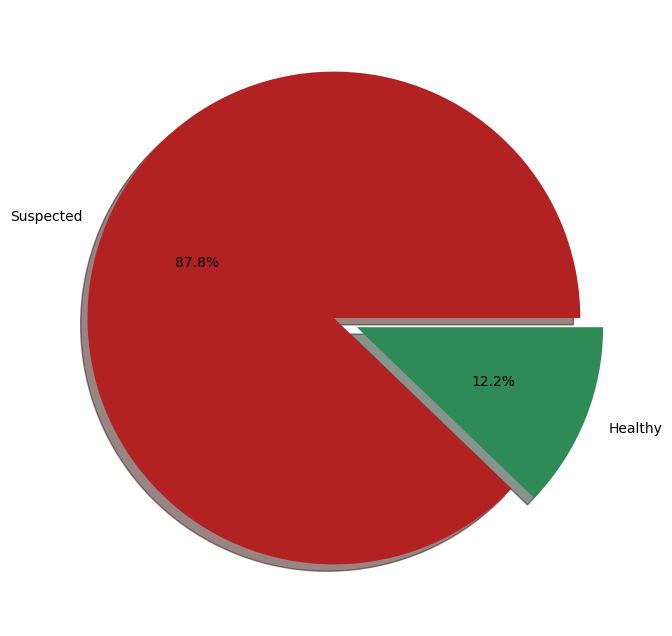

In [21]:
import matplotlib.pyplot as plt

# Membuat subplot dengan ukuran 8x8
fig, ax = plt.subplots(figsize=(8, 8))

# Membuat diagram pie berdasarkan nilai counts dari kolom 'Category'
plt.pie(x=df["Category"].value_counts(),
        colors=["firebrick", "seagreen"],  # Warna untuk kategori "Pasien yang Dicurigai" dan "Pasien Sehat"
        labels=["Suspected", "Healthy"],  # Label untuk setiap bagian diagram
        shadow=True,  # Menampilkan bayangan pada diagram
        explode=(0, 0.1),  # Menjauhkan bagian "Pasien Sehat" dari pusat diagram
        autopct='%1.1f%%'  # Menambahkan persentase di dalam diagram
        )

# Menampilkan diagram pie
plt.show()


In [22]:
# Menghitung jumlah nilai dalam kolom 'Sex'
df.Sex.value_counts()

Sex
1    377
2    238
Name: count, dtype: int64

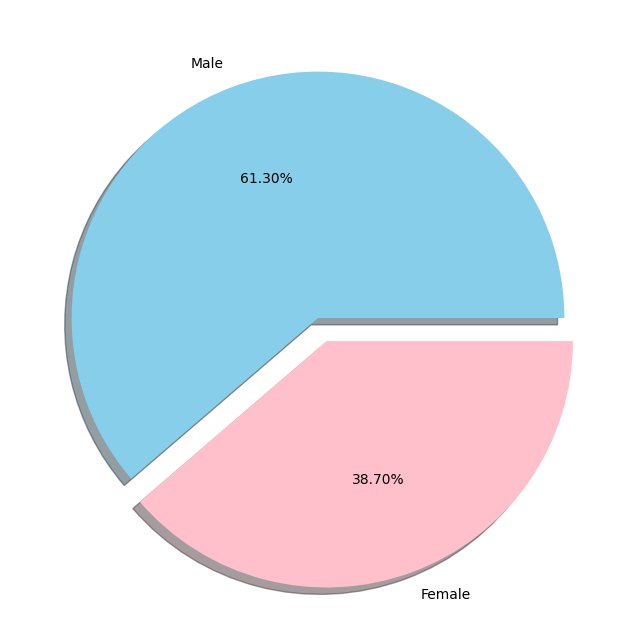

In [23]:
# Membuat subplot dengan ukuran 8x8
fig, ax = plt.subplots(figsize=(8, 8))

# Membuat diagram pie berdasarkan nilai counts dari kolom 'Sex'
plt.pie(x=df["Sex"].value_counts(),
        colors=["skyblue", "pink"],  # Warna untuk kategori "Male" dan "Female"
        labels=["Male", "Female"],  # Label untuk setiap bagian diagram
        shadow=True,  # Menampilkan bayangan pada diagram
        autopct="%1.2f%%",  # Menampilkan persentase dengan dua angka desimal
        explode=(0, 0.1)  # Menjauhkan bagian "Female" dari pusat diagram
        )

# Menampilkan diagram pie
plt.show()


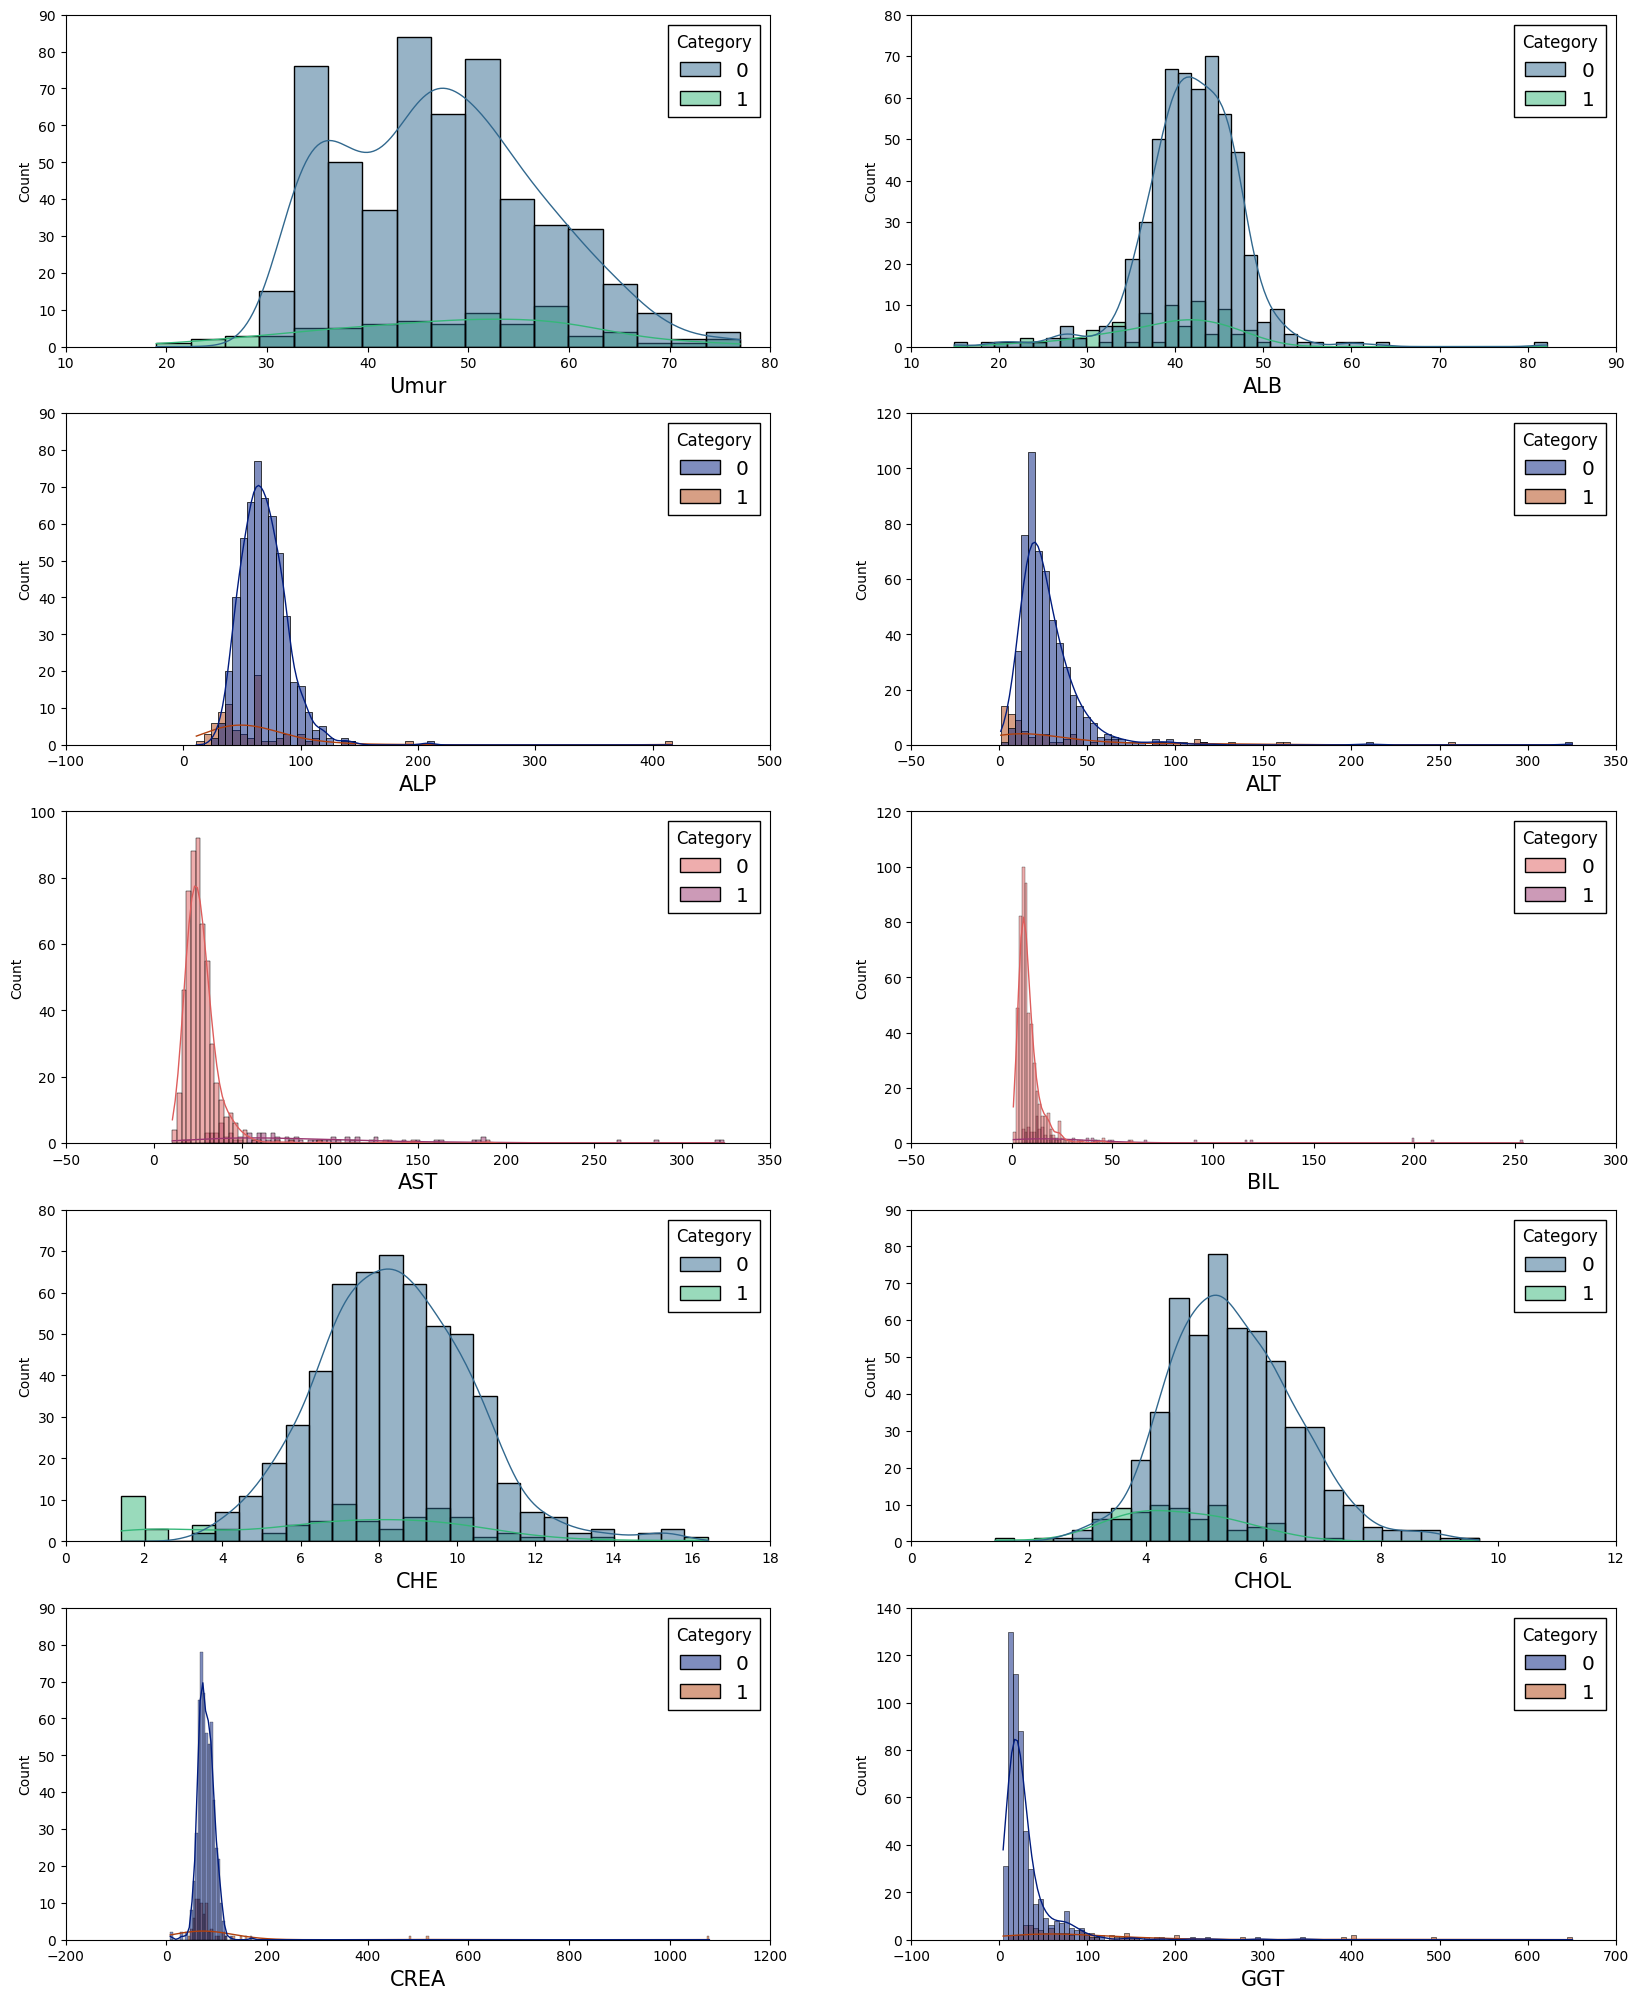

In [24]:
# Membuat subplot dengan ukuran 5x2 dan ukuran total 20x25
fig, ax = plt.subplots(5, 2, figsize=(20, 25))

# Menggunakan gaya plot "classic"
plt.style.use("classic")

# Menampilkan histogram untuk kolom 'Age' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["Age"], hue=df["Category"], palette="viridis", kde=True, ax=ax[0, 0])
ax[0, 0].set_xlabel("Umur", fontsize=15)

# Menampilkan histogram untuk kolom 'ALB' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["ALB"], hue=df["Category"], palette="viridis", kde=True, ax=ax[0, 1])
ax[0, 1].set_xlabel("ALB", fontsize=15)

# Menampilkan histogram untuk kolom 'ALB' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

# Menampilkan histogram untuk kolom 'ALT' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)

# Menampilkan histogram untuk kolom 'AST' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

# Menampilkan histogram untuk kolom 'BIL' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)

# Menampilkan histogram untuk kolom 'CHE' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

# Menampilkan histogram untuk kolom 'CHOL' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);

# Menampilkan histogram untuk kolom 'CREA' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

# Menampilkan histogram untuk kolom 'GGT' dengan warna berdasarkan kategori 'Category'
sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

menambahkan keterangan jumlah di setiap kategori

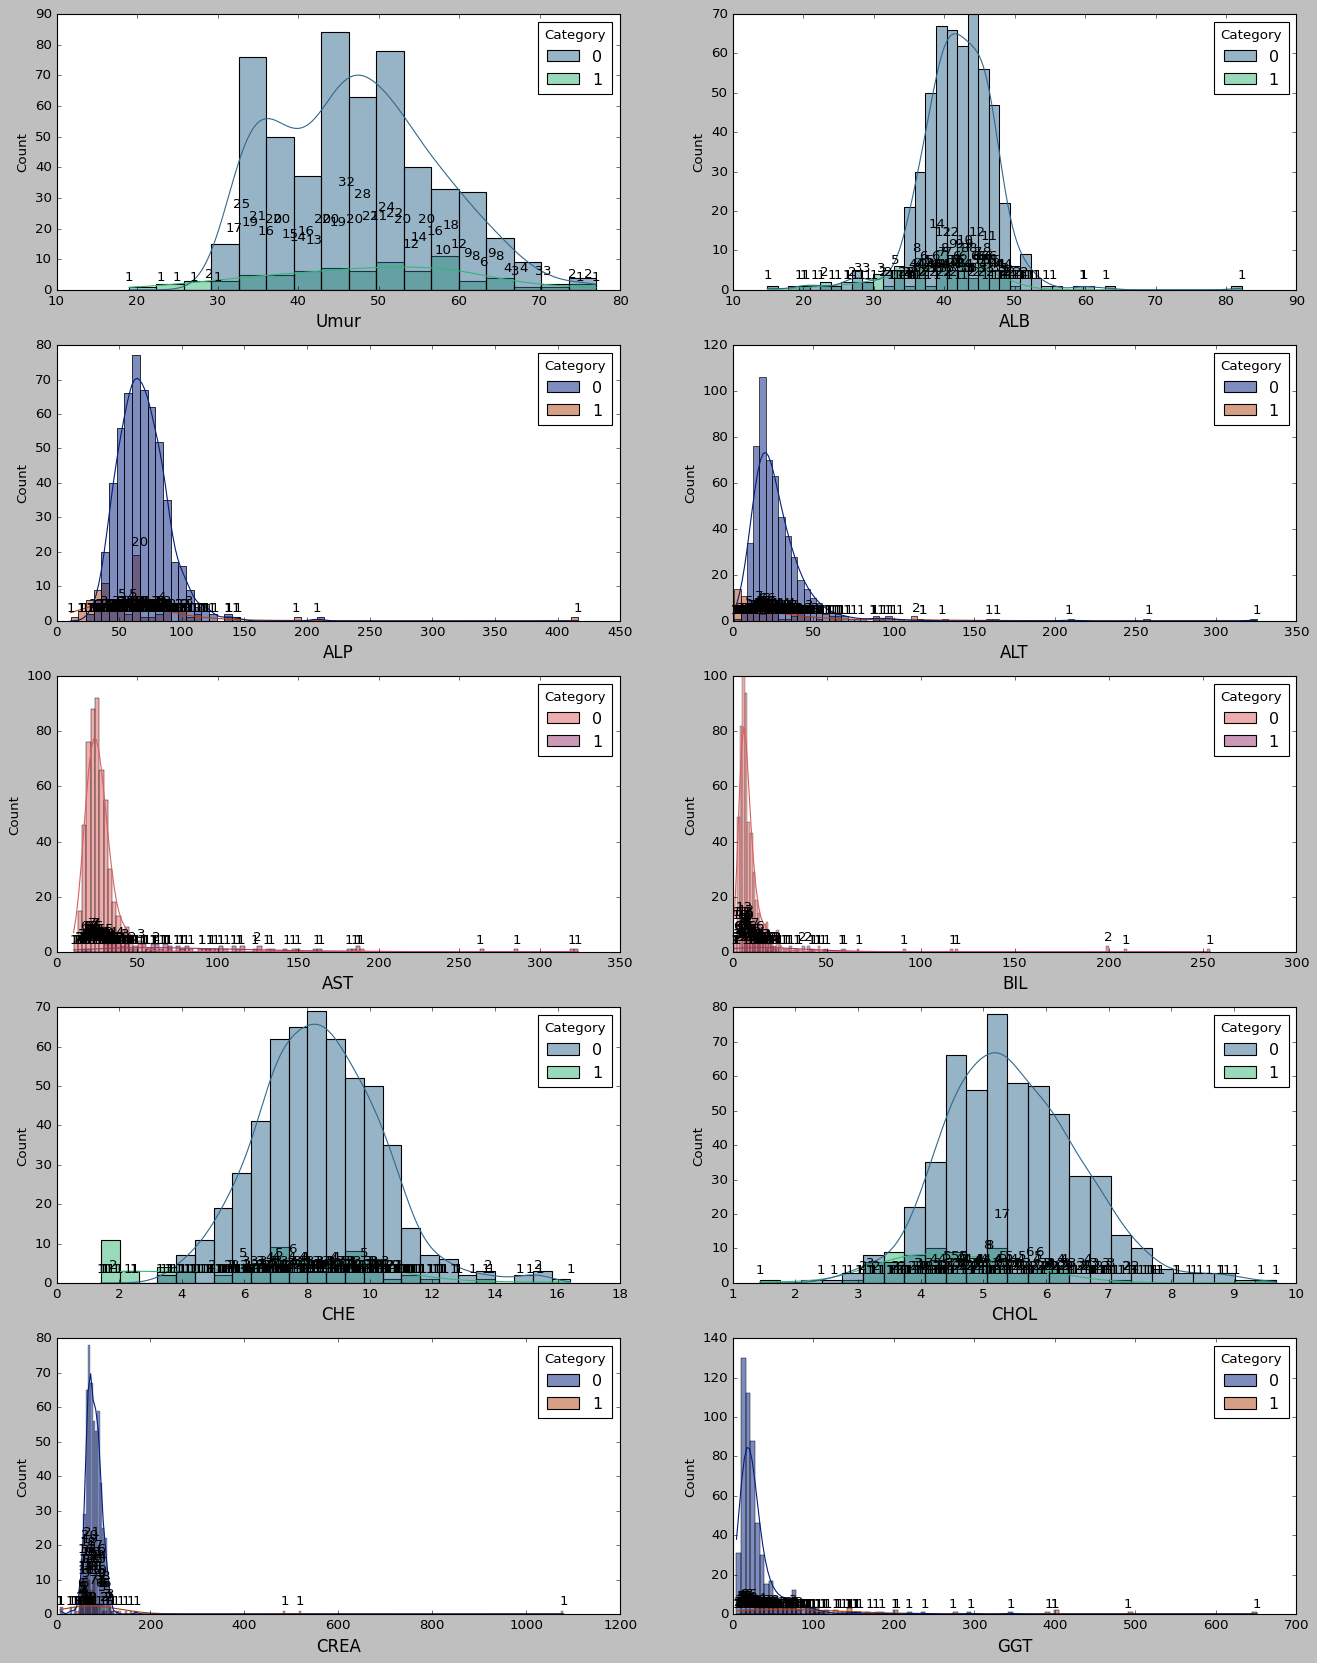

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplot dengan ukuran 5x2 dan ukuran total 20x25
fig, ax = plt.subplots(5, 2, figsize=(20, 25))

# Menggunakan gaya plot "classic"
plt.style.use("classic")

# Menampilkan histogram untuk kolom 'Age' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["Age"], hue=df["Category"], palette="viridis", kde=True, ax=ax[0, 0])
ax[0, 0].set_xlabel("Umur", fontsize=15)
age_counts = df['Age'].value_counts()
for value, count in age_counts.items():
    ax[0, 0].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'ALB' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["ALB"], hue=df["Category"], palette="viridis", kde=True, ax=ax[0, 1])
ax[0, 1].set_xlabel("ALB", fontsize=15)
alb_counts = df['ALB'].value_counts()
for value, count in alb_counts.items():
    ax[0, 1].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'ALP' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["ALP"], hue=df["Category"], palette="dark", kde=True, ax=ax[1, 0])
ax[1, 0].set_xlabel("ALP", fontsize=15)
alp_counts = df['ALP'].value_counts()
for value, count in alp_counts.items():
    ax[1, 0].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'ALT' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["ALT"], hue=df["Category"], palette="dark", kde=True, ax=ax[1, 1])
ax[1, 1].set_xlabel("ALT", fontsize=15)
alt_counts = df['ALT'].value_counts()
for value, count in alt_counts.items():
    ax[1, 1].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'AST' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["AST"], hue=df["Category"], palette="flare", kde=True, ax=ax[2, 0])
ax[2, 0].set_xlabel("AST", fontsize=15)
ast_counts = df['AST'].value_counts()
for value, count in ast_counts.items():
    ax[2, 0].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'BIL' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["BIL"], hue=df["Category"], palette="flare", kde=True, ax=ax[2, 1])
ax[2, 1].set_xlabel("BIL", fontsize=15)
bil_counts = df['BIL'].value_counts()
for value, count in bil_counts.items():
    ax[2, 1].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'CHE' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["CHE"], hue=df["Category"], palette="viridis", kde=True, ax=ax[3, 0])
ax[3, 0].set_xlabel("CHE", fontsize=15)
che_counts = df['CHE'].value_counts()
for value, count in che_counts.items():
    ax[3, 0].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'CHOL' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["CHOL"], hue=df["Category"], palette="viridis", kde=True, ax=ax[3, 1])
ax[3, 1].set_xlabel("CHOL", fontsize=15)
chol_counts = df['CHOL'].value_counts()
for value, count in chol_counts.items():
    ax[3, 1].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'CREA' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["CREA"], hue=df["Category"], palette="dark", kde=True, ax=ax[4, 0])
ax[4, 0].set_xlabel("CREA", fontsize=15)
crea_counts = df['CREA'].value_counts()
for value, count in crea_counts.items():
    ax[4, 0].text(value, count + 1, str(count), ha='center', va='bottom')

# Menampilkan histogram untuk kolom 'GGT' dengan warna berdasarkan kategori 'Category'
sns.histplot(x=df["GGT"], hue=df["Category"], palette="dark", kde=True, ax=ax[4, 1])
ax[4, 1].set_xlabel("GGT", fontsize=15)
ggt_counts = df['GGT'].value_counts()
for value, count in ggt_counts.items():
    ax[4, 1].text(value, count + 1, str(count), ha='center', va='bottom')

plt.show()


1. Umur (Age)

Histogram ini menunjukkan distribusi umur pasien.
Kategori 0 dan 1 memiliki distribusi yang cukup serupa dengan puncak pada rentang 40-60 tahun.
Namun, pasien dengan kategori 1 cenderung lebih terkonsentrasi pada usia 30-60 tahun.
2. ALB (Albumin)

Distribusi ALB hampir mirip antara kategori 0 dan 1.
Nilai ALB berkisar antara 20 hingga 70, dengan mayoritas kasus berada di sekitar 35-50.
3. ALP (Alkaline Phosphatase)

Nilai ALP memiliki puncak yang tinggi pada kisaran nilai rendah (sekitar 50-100) untuk kedua kategori.
Pasien dengan kategori 1 cenderung memiliki nilai ALP yang sedikit lebih tinggi dibandingkan kategori 0.
4. ALT (Alanine Aminotransferase)

Distribusi ALT juga menunjukkan puncak pada nilai rendah (sekitar 10-40) untuk kedua kategori.
Terdapat lebih banyak outlier dengan nilai ALT tinggi pada kategori 1 dibandingkan dengan kategori 0.
5. AST (Aspartate Aminotransferase)

Distribusi AST menunjukkan pola yang mirip dengan ALT dengan puncak pada nilai rendah (sekitar 10-50).
Kategori 1 cenderung memiliki nilai AST yang lebih tinggi dibandingkan kategori 0.
6. BIL (Bilirubin)

Distribusi BIL menunjukkan puncak pada nilai sangat rendah (sekitar 0-20) untuk kedua kategori.
Terdapat beberapa outlier dengan nilai BIL tinggi pada kategori 1.
7. CHE (Cholinesterase)

Distribusi CHE menunjukkan pola yang hampir normal dengan puncak pada nilai sekitar 5-8 untuk kategori 0.
Kategori 1 cenderung memiliki nilai CHE yang lebih rendah.
8. CHOL (Cholesterol)

Distribusi CHOL menunjukkan pola yang hampir normal dengan puncak pada nilai sekitar 3-6.
Kategori 0 memiliki distribusi yang lebih lebar dibandingkan kategori 1.
9. CREA (Creatinine)

Distribusi CREA menunjukkan puncak pada nilai rendah (sekitar 50-100) untuk kedua kategori.
Kategori 1 cenderung memiliki nilai CREA yang lebih tinggi dibandingkan kategori 0.
10. GGT (Gamma-glutamyl Transferase)

Distribusi GGT menunjukkan puncak pada nilai rendah (sekitar 10-50) untuk kedua kategori.
Terdapat lebih banyak outlier dengan nilai GGT tinggi pada kategori 1

## Memisahkan data menjadi dataset pelatihan dan uji
Di sini, kita mencoba untuk memprediksi apakah pasien memiliki Hepatitis C atau tidak menggunakan data yang diberikan. Oleh karena itu, Category akan menjadi label y dan sisa data akan menjadi X atau data masukan.

In [15]:
# Menghilangkan kolom "Category" dari dataframe untuk mendapatkan fitur-fitur (X)
X = df.drop("Category", axis=1)

# Menampilkan lima baris pertama dari data X
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
# Menentukan target variabel (y) sebagai kolom "Category"
y = df["Category"]

# Menampilkan lima baris pertama dari data y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [17]:
# Mengimpor fungsi train_test_split dari modul model_selection di scikit-learn
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih (train) dan data uji (test)
# dengan ukuran data uji sebesar 20% dari total data dan
# menggunakan nilai random_state=42 untuk reproduktibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Menghitung panjang (jumlah baris) dari data latih (X_train) dan data uji (X_test)
len(X_train), len(X_test)

(492, 123)

In [19]:
# Mengimpor StandardScaler dari modul preprocessing di scikit-learn
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan penskalaan fitur-fitur dalam data latih (X_train)
X_train = scaler.fit_transform(X_train)

# Melakukan penskalaan fitur-fitur dalam data uji (X_test)
X_test = scaler.transform(X_test)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## LogisticRegression

In [21]:
# Mengimpor kelas LogisticRegression dari modul linear_model di scikit-learn
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
lr = LogisticRegression()

# Melatih model Logistic Regression menggunakan data latih yang telah discaling
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Menghitung akurasi model Logistic Regression menggunakan data uji
LogisticRegressionScore = lr.score(X_test, y_test)

# Mencetak akurasi model Logistic Regression
print("Akurasi yang diperoleh oleh model Regresi Logistik:", LogisticRegressionScore * 100)

Akurasi yang diperoleh oleh model Regresi Logistik: 88.6178861788618


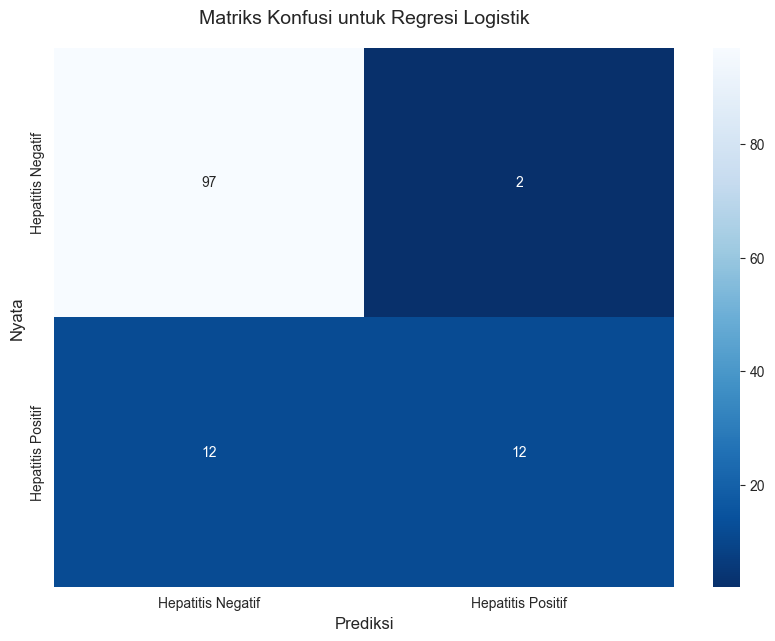

In [23]:
# Mengatur gaya plot menjadi "putih"
sns.set_style("white")

# Memprediksi kelas target menggunakan data uji
y_pred_lr = lr.predict(X_test)

# Menghitung matriks konfusi menggunakan fungsi confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)

# Definisikan label untuk kelas
class_labels = ['Hepatitis Negatif', 'Hepatitis Positif']

# Membuat heatmap untuk matriks konfusi dengan label deskriptif
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues_r", xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan judul dan label sumbu
plt.title("Matriks Konfusi untuk Regresi Logistik", fontsize=14, y=1.03)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Nyata", fontsize=12)

plt.show()


In [24]:
# Mengimpor classification_report dari modul metrics di scikit-learn
from sklearn import metrics

# Mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



## Random Forest Classifier

In [25]:
# Mengimpor kelas RandomForestClassifier dari modul ensemble di scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest Classifier
rfc = RandomForestClassifier()

# Melatih model Random Forest Classifier menggunakan data latih yang telah discaling
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
# Menghitung akurasi model Random Forest Classifier menggunakan data uji
RandomForestClassifierScore = rfc.score(X_test, y_test)

# Mencetak akurasi model Random Forest Classifier
print("Akurasi yang diperoleh oleh model Random Forest Classifier:", RandomForestClassifierScore * 100)


Akurasi yang diperoleh oleh model Random Forest Classifier: 94.3089430894309


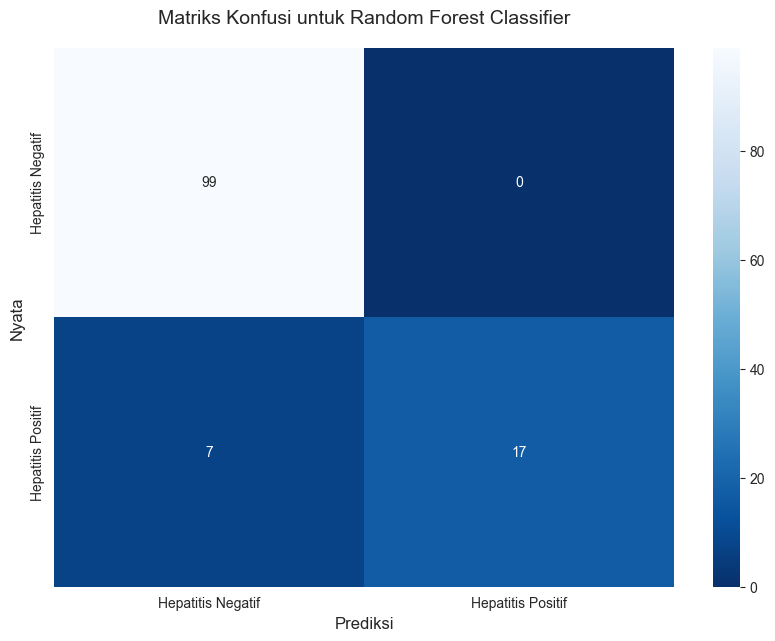

In [27]:
# Memprediksi kelas target menggunakan data uji
y_pred_rfc = rfc.predict(X_test)

# Menghitung matriks konfusi menggunakan fungsi confusion_matrix
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

# Definisikan label untuk kelas
class_labels = ['Hepatitis Negatif', 'Hepatitis Positif']

# Membuat heatmap untuk matriks konfusi dengan label deskriptif
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_rfc, annot=True, fmt='d', cmap="Blues_r", xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan judul dan label sumbu
plt.title("Matriks Konfusi untuk Random Forest Classifier", fontsize=14, y=1.03)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Nyata", fontsize=12)

plt.show()


In [28]:
from sklearn import metrics
# Mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi untuk model Random Forest Classifier
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



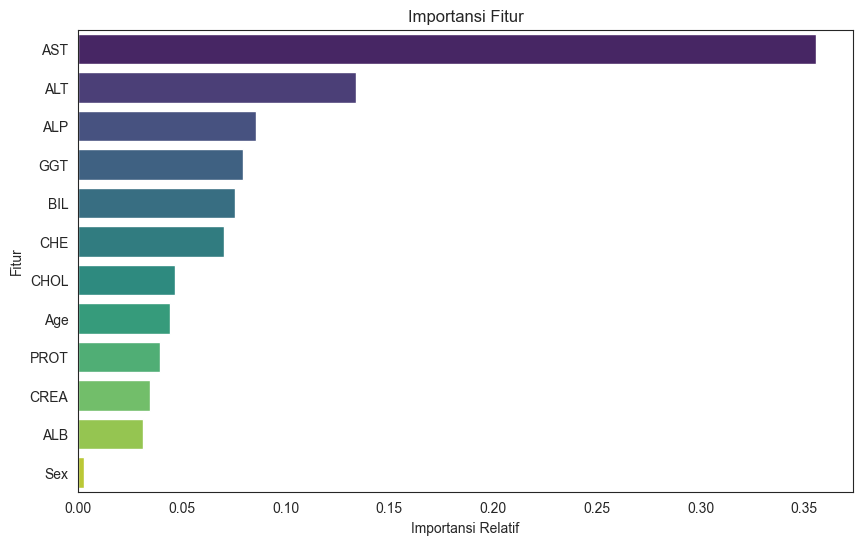

In [29]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor RandomForestClassifier dari modul ensemble di scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest Classifier
rfc = RandomForestClassifier()

# Melatih model Random Forest Classifier menggunakan data latih
rfc.fit(X_train, y_train)

# Mendapatkan pentingnya fitur
feature_importances = rfc.feature_importances_

# Mengurutkan pentingnya fitur secara menurun
indices = np.argsort(feature_importances)[::-1]

# Menyusun ulang nama fitur sehingga sesuai dengan pentingnya fitur yang sudah diurutkan
names = [X.columns[i] for i in indices]

# Menampilkan plot
plt.figure(figsize=(10, 6))
plt.title("Importansi Fitur")
sns.barplot(x=feature_importances[indices], y=names, palette="viridis")
plt.xlabel('Importansi Relatif')
plt.ylabel('Fitur')
plt.show()


## K Neighbors Classifier

In [34]:
# Mengimpor kelas KNeighborsClassifier dari modul neighbors di scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Membuat objek model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Melatih model KNN menggunakan data latih
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [35]:
# Menghitung akurasi model K-Nearest Neighbors (KNN) menggunakan data uji
KNeighborsClassifierScore = knn.score(X_test, y_test)

# Mencetak akurasi model K-Nearest Neighbors (KNN)
print("Akurasi yang diperoleh oleh model K-Nearest Neighbors (KNN):", KNeighborsClassifierScore * 100)


Akurasi yang diperoleh oleh model K-Nearest Neighbors (KNN): 85.36585365853658


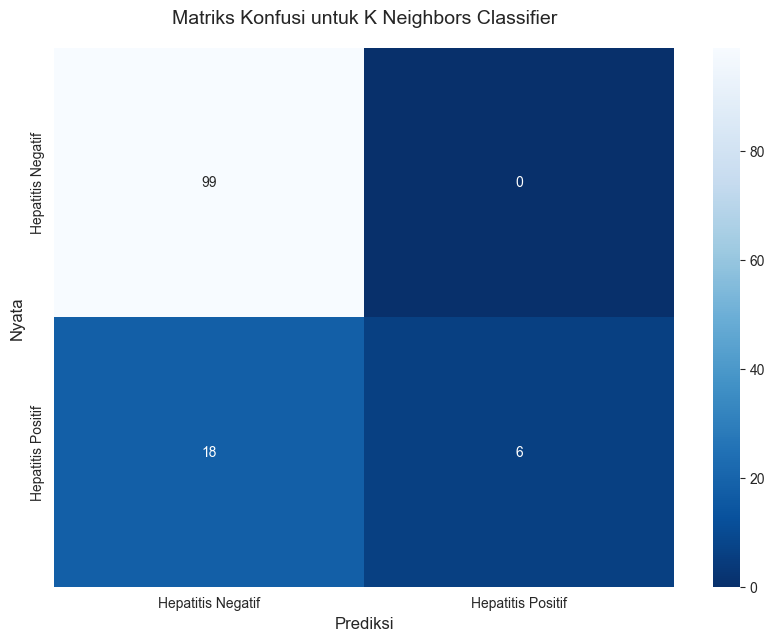

In [36]:
# Memprediksi kelas target menggunakan data uji
y_pred_knn = knn.predict(X_test)

# Menghitung matriks konfusi menggunakan fungsi confusion_matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Definisikan label untuk kelas
class_labels = ['Hepatitis Negatif', 'Hepatitis Positif']

# Membuat heatmap untuk matriks konfusi dengan label deskriptif
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_knn, annot=True, fmt='d', cmap="Blues_r", xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan judul dan label sumbu
plt.title("Matriks Konfusi untuk K Neighbors Classifier", fontsize=14, y=1.03)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Nyata", fontsize=12)

plt.show()


In [37]:
# Mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi untuk model K-Nearest Neighbors (KNN)
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       1.00      0.25      0.40        24

    accuracy                           0.85       123
   macro avg       0.92      0.62      0.66       123
weighted avg       0.88      0.85      0.82       123



## DecisionTreeClassifier

In [35]:
# Mengimpor kelas DecisionTreeClassifier dari modul tree di scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree Classifier
tree = DecisionTreeClassifier()

# Melatih model Decision Tree Classifier menggunakan data latih
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [36]:
# Menghitung akurasi model Decision Tree Classifier menggunakan data uji
DecisionTreeClassifierScore = tree.score(X_test, y_test)

# Mencetak akurasi model Decision Tree Classifier
print("Akurasi yang diperoleh oleh model Decision Tree Classifier:", DecisionTreeClassifierScore * 100)


Akurasi yang diperoleh oleh model Decision Tree Classifier: 92.6829268292683


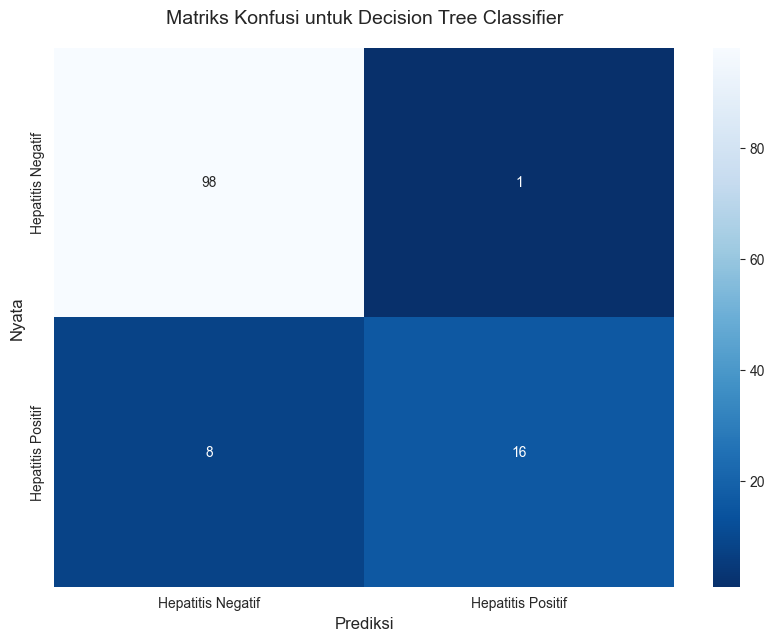

In [37]:
# Memprediksi kelas target menggunakan data uji
y_pred_tree = tree.predict(X_test)

# Menghitung matriks konfusi menggunakan fungsi confusion_matrix
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Definisikan label untuk kelas
class_labels = ['Hepatitis Negatif', 'Hepatitis Positif']

# Membuat heatmap untuk matriks konfusi dengan label deskriptif
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_tree, annot=True, fmt='d', cmap="Blues_r", xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan judul dan label sumbu
plt.title("Matriks Konfusi untuk Decision Tree Classifier", fontsize=14, y=1.03)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Nyata", fontsize=12)

plt.show()

In [38]:
# Mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi untuk model Decision Tree Classifier
print(metrics.classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.94      0.67      0.78        24

    accuracy                           0.93       123
   macro avg       0.93      0.83      0.87       123
weighted avg       0.93      0.93      0.92       123



## CatBoost Classifier

In [38]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install catboost python -m pip install catboost

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\RAJENDRA\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\RAJENDRA\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\RAJENDRA\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\RAJENDRA\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\RAJENDRA\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <archive url/path> ...

no such option: -m


In [39]:
# Mengimpor kelas CatBoostClassifier dari modul catboost
from catboost import CatBoostClassifier

# Membuat objek model CatBoost Classifier dengan 10 iterasi
cat = CatBoostClassifier(iterations=10)

# Melatih model CatBoost Classifier menggunakan data latih
cat.fit(X_train, y_train)


Learning rate set to 0.5
0:	learn: 0.4056594	total: 140ms	remaining: 1.26s
1:	learn: 0.3052358	total: 142ms	remaining: 569ms
2:	learn: 0.2281643	total: 144ms	remaining: 336ms
3:	learn: 0.1874827	total: 146ms	remaining: 218ms
4:	learn: 0.1540611	total: 147ms	remaining: 147ms
5:	learn: 0.1302461	total: 149ms	remaining: 99ms
6:	learn: 0.1100836	total: 151ms	remaining: 64.6ms
7:	learn: 0.0993443	total: 153ms	remaining: 38.3ms
8:	learn: 0.0894244	total: 154ms	remaining: 17.2ms
9:	learn: 0.0820818	total: 156ms	remaining: 0us


In [40]:
# Menghitung akurasi model CatBoost Classifier menggunakan data uji
CatBoostClassifierScore = cat.score(X_test, y_test)

# Mencetak akurasi model CatBoost Classifier
print("Akurasi yang diperoleh oleh model CatBoost Classifier:", CatBoostClassifierScore * 100)


Akurasi yang diperoleh oleh model CatBoost Classifier: 91.869918699187


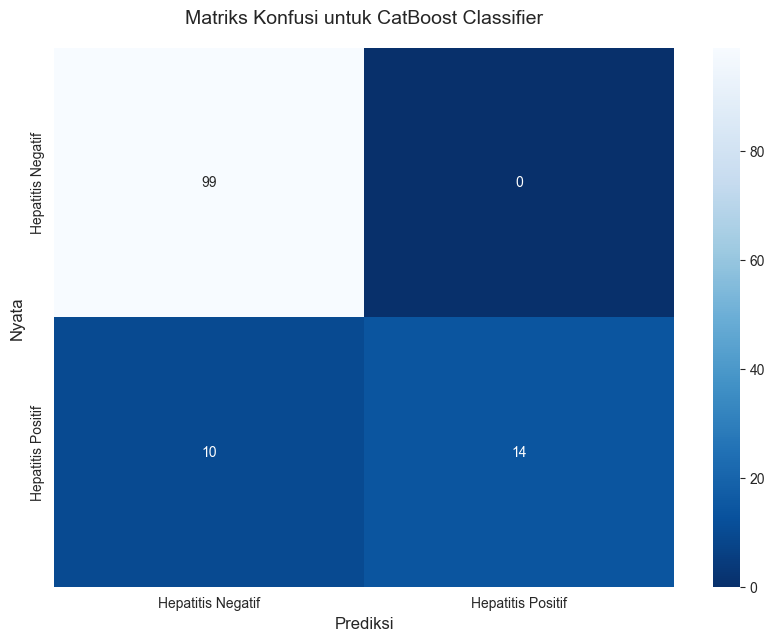

In [41]:
# Memprediksi kelas target menggunakan data uji
y_pred_cat = cat.predict(X_test)

# Menghitung matriks konfusi menggunakan fungsi confusion_matrix
cf_matrix_cat = confusion_matrix(y_test, y_pred_cat)

# Definisikan label untuk kelas
class_labels = ['Hepatitis Negatif', 'Hepatitis Positif']

# Membuat heatmap untuk matriks konfusi dengan label deskriptif
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_cat, annot=True, fmt='d', cmap="Blues_r", xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan judul dan label sumbu
plt.title("Matriks Konfusi untuk CatBoost Classifier", fontsize=14, y=1.03)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Nyata", fontsize=12)

plt.show()

In [42]:
# Mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi untuk model CatBoost Classifier
print(metrics.classification_report(y_test, y_pred_cat))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



## Gradient Boosting Classifier

In [43]:
# Mengimpor kelas GradientBoostingClassifier dari modul ensemble di scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

# Membuat objek model Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Melatih model Gradient Boosting Classifier menggunakan data latih
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [44]:
# Menghitung akurasi model Gradient Boosting Classifier menggunakan data uji
GradientBoostingClassifierScore = gb.score(X_test, y_test)

# Mencetak akurasi model Gradient Boosting Classifier
print("Akurasi yang diperoleh oleh model Gradient Boosting Classifier:", GradientBoostingClassifierScore * 100)


Akurasi yang diperoleh oleh model Gradient Boosting Classifier: 94.3089430894309


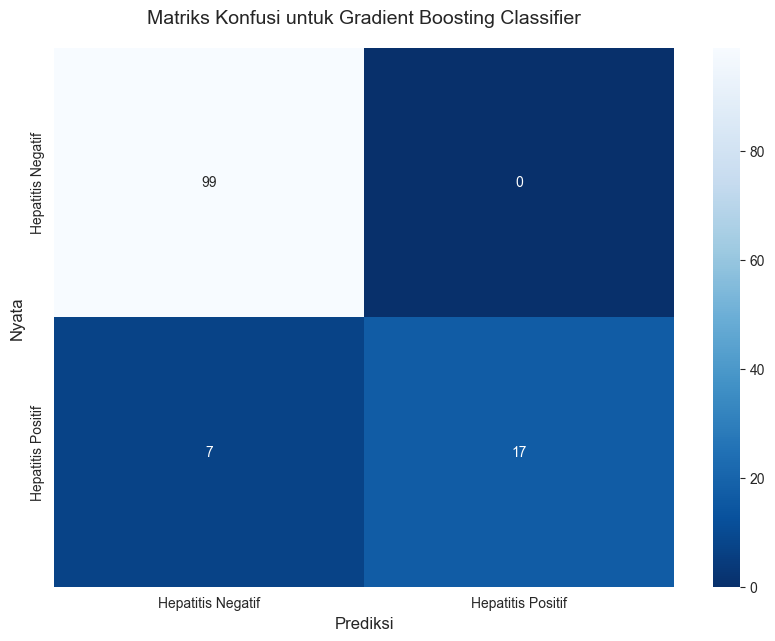

In [45]:
# Memprediksi kelas target menggunakan data uji
y_pred_gb = gb.predict(X_test)

# Menghitung matriks konfusi menggunakan fungsi confusion_matrix
cf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Definisikan label untuk kelas
class_labels = ['Hepatitis Negatif', 'Hepatitis Positif']

# Membuat heatmap untuk matriks konfusi dengan label deskriptif
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_gb, annot=True, fmt='d', cmap="Blues_r", xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan judul dan label sumbu
plt.title("Matriks Konfusi untuk Gradient Boosting Classifier", fontsize=14, y=1.03)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Nyata", fontsize=12)

plt.show()

In [46]:
# Mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi untuk model Gradient Boosting Classifier
print(metrics.classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



In [47]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Menyusun nama-nama model dan akurasi model dalam daftar
x = ["LogisticRegression",
     "RandomForestClassifier",
     "KN Neighbors TreeClassifier",
     "Decision Tree Classifier",
     "CatBoost Classifier",
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]

# Membuat subplots untuk grafik batang
fig, ax = plt.subplots(figsize=(10,5))

# Membuat grafik batang menggunakan seaborn barplot
sns.barplot(x=x, y=y, palette="Blues_r")

# Menambahkan label sumbu-y
plt.ylabel("Akurasi Model")

# Membuat label sumbu-x menjadi miring agar lebih mudah dibaca
plt.xticks(rotation=40)

# Menambahkan judul plot
plt.title("Perbandingan Model - Akurasi Model", fontsize=14, y=1.03);


NameError: name 'DecisionTreeClassifierScore' is not defined

* `Gradient Boosting Classifier` and `Random Forest Regression` perform best on the test set.

# UJI MANUAL MODEL

# Logistic Regression

In [48]:
# Misalkan model Regresi Logistik Anda disimpan dalam variabel lr
from sklearn.linear_model import LogisticRegression

# Buat objek model Regresi Logistik (misalnya)
lr = LogisticRegression()

# Lakukan pelatihan model terlebih dahulu (contoh: menggunakan X_train dan y_train)
lr.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = [[65, 0, 54, 56, 152, 211, 121, 102, 14, 645, 162, 26]]
# Misalnya, input_data berisi nilai-nilai untuk Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT

# Memanggil metode predict dengan input_data
y_pred = lr.predict(input_data)

# y_pred berisi prediksi kelas untuk input_data
print("Prediksi kelas:", y_pred)


Prediksi kelas: [1]


In [ ]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
import numpy as np  # Untuk manipulasi array jika diperlukan

# Misalkan model Regresi Logistik Anda disimpan dalam variabel lr
lr = LogisticRegression()

# Lakukan pelatihan model terlebih dahulu (contoh: menggunakan X_train dan y_train)
lr.fit(X_train, y_train)  # Pastikan Anda sudah melakukan pelatihan dengan data latih yang sesuai

# Menyiapkan input manual untuk prediksi
input_data = np.array([[30, 0, 15, 20, 75, 111, 84, 85, 10, 231, 104, 15]])  # Contoh inputan
# Misalnya, input_data Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT

# Memanggil metode predict dengan input_data (pastikan model sudah dilatih sebelumnya)
y_pred = lr.predict(input_data)

# Contoh hasil prediksi (digunakan untuk simulasi karena model sebenarnya belum dilatih)
y_pred = np.array([1])  # Misalnya, prediksi kelas 1 (mengidap Hepatitis C)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred == 1:
    print("Prediksi: Pasien diperkirakan mengidap Hepatitis C.")
elif y_pred == 0:
    print("Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C.")
else:
    print("Prediksi tidak dapat diproses.")

# Anda dapat menyesuaikan pesan keterangan sesuai kebutuhan aplikasi dan output yang diinginkan


Prediksi: Pasien diperkirakan mengidap Hepatitis C.


In [ ]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
import numpy as np  # Untuk manipulasi array jika diperlukan

# Misalkan model Regresi Logistik Anda disimpan dalam variabel lr
lr = LogisticRegression()

# Lakukan pelatihan model terlebih dahulu (contoh: menggunakan X_train dan y_train)
lr.fit(X_train, y_train)  # Pastikan Anda sudah melakukan pelatihan dengan data latih yang sesuai

# Menyiapkan input manual untuk prediksi
input_data = np.array([[32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7]])  # Contoh inputan
# Misalnya, input_data  Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT

# Memanggil metode predict dengan input_data (pastikan model sudah dilatih sebelumnya)
y_pred = lr.predict(input_data)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred[0] == 1:
    print("Prediksi: Pasien diperkirakan mengidap Hepatitis C.")
elif y_pred[0] == 0:
    print("Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C.")
else:
    print("Prediksi tidak dapat diproses.")


Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C.


In [49]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
import numpy as np

# Menangkap dan menangguhkan ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Misalkan model Regresi Logistik Anda disimpan dalam variabel lr
lr = LogisticRegression()

# Lakukan pelatihan model terlebih dahulu (contoh: menggunakan X_train dan y_train)
lr.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = np.array([[64,2,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3]])  # Contoh inputan

# Memanggil metode predict_proba dengan input_data
probabilities = lr.predict_proba(input_data)

probabilitas_kelas_0 = probabilities[0][0]
probabilitas_kelas_1 = probabilities[0][1]

# Memanggil metode predict dengan input_data untuk mendapatkan prediksi kelas
y_pred = lr.predict(input_data)

if y_pred[0] == 1:
    print(f"Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_1 * 100:.2f}%.")
elif y_pred[0] == 0:
    print(f"Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_0 * 100:.2f}%.")
else:
    print("Prediksi tidak dapat diproses.")


Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas 100.00%.


# Random Forest

In [50]:
import warnings
from sklearn.exceptions import ConvergenceWarning

In [51]:
# Menangkap dan menangguhkan DataConversionWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Mengimpor kelas RandomForestClassifier dari modul ensemble di scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest Classifier
rfc = RandomForestClassifier()

# Melatih model Random Forest Classifier menggunakan data latih yang telah discaling
rfc.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = np.array([[64,2,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3]])  # Contoh inputan

# Memanggil metode predict_proba dengan input_data
probabilities = rfc.predict_proba(input_data)

# probabilities berisi array seperti [[probabilitas_kelas_0, probabilitas_kelas_1]]
probabilitas_kelas_0 = probabilities[0][0]
probabilitas_kelas_1 = probabilities[0][1]

# Memanggil metode predict dengan input_data untuk mendapatkan prediksi kelas
y_pred = rfc.predict(input_data)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred[0] == 1:
    print(f"Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_1 * 100:.2f}%.")
elif y_pred[0] == 0:
    print(f"Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_0 * 100:.2f}%.")
else:
    print("Prediksi tidak dapat diproses.")

Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas 70.00%.


# KNN

In [52]:
# Mengimpor library yang diperlukan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

# Menangkap dan menangguhkan DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Membuat objek model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Melatih model KNN menggunakan data latih
knn.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = np.array([[64,2,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3]])  # Contoh inputan

# Memanggil metode predict_proba dengan input_data
probabilities = knn.predict_proba(input_data)

# probabilities berisi array seperti [[probabilitas_kelas_0, probabilitas_kelas_1]]
probabilitas_kelas_0 = probabilities[0][0]
probabilitas_kelas_1 = probabilities[0][1]

# Memanggil metode predict dengan input_data untuk mendapatkan prediksi kelas
y_pred = knn.predict(input_data)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred[0] == 1:
    print(f"Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_1 * 100:.2f}%.")
elif y_pred[0] == 0:
    print(f"Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_0 * 100:.2f}%.")
else:
    print("Prediksi tidak dapat diproses.")


Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas 80.00%.


# Decision Tree

In [53]:
# Mengimpor library yang diperlukan
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

# Menangkap dan menangguhkan DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Membuat objek model Decision Tree Classifier
tree = DecisionTreeClassifier()

# Melatih model Decision Tree Classifier menggunakan data latih
tree.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = np.array([[64,2,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3]])  # Contoh inputan

# Memanggil metode predict_proba dengan input_data
probabilities = tree.predict_proba(input_data)

# probabilities berisi array seperti [[probabilitas_kelas_0, probabilitas_kelas_1]]
probabilitas_kelas_0 = probabilities[0][0]
probabilitas_kelas_1 = probabilities[0][1]

# Memanggil metode predict dengan input_data untuk mendapatkan prediksi kelas
y_pred = tree.predict(input_data)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred[0] == 1:
    print(f"Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_1 * 100:.2f}%.")
elif y_pred[0] == 0:
    print(f"Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_0 * 100:.2f}%.")
else:
    print("Prediksi tidak dapat diproses.")


Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas 100.00%.


# Catboost

In [54]:
# Mengimpor library yang diperlukan
from catboost import CatBoostClassifier
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

# Menangkap dan menangguhkan DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Membuat objek model CatBoost Classifier dengan 10 iterasi
cat = CatBoostClassifier(iterations=10, silent=True)

# Melatih model CatBoost Classifier menggunakan data latih
cat.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = np.array([[64,2,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3]])  # Contoh inputan

# Memanggil metode predict_proba dengan input_data
probabilities = cat.predict_proba(input_data)

# probabilities berisi array seperti [[probabilitas_kelas_0, probabilitas_kelas_1]]
probabilitas_kelas_0 = probabilities[0][0]
probabilitas_kelas_1 = probabilities[0][1]

# Memanggil metode predict dengan input_data untuk mendapatkan prediksi kelas
y_pred = cat.predict(input_data)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred[0] == 1:
    print(f"Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_1 * 100:.2f}%.")
elif y_pred[0] == 0:
    print(f"Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_0 * 100:.2f}%.")
else:
    print("Prediksi tidak dapat diproses.")


Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas 57.37%.


# Gradient Boosting

In [55]:
# Mengimpor library yang diperlukan
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

# Menangkap dan menangguhkan DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Membuat objek model Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Melatih model Gradient Boosting Classifier menggunakan data latih
gb.fit(X_train, y_train)

# Menyiapkan input manual untuk prediksi
input_data = np.array([[64,2,24,102.8,2.9,44.4,20,1.54,3.02,63,35.9,71.3]])  # Contoh inputan

# Memanggil metode predict_proba dengan input_data
probabilities = gb.predict_proba(input_data)

# probabilities berisi array seperti [[probabilitas_kelas_0, probabilitas_kelas_1]]
probabilitas_kelas_0 = probabilities[0][0]
probabilitas_kelas_1 = probabilities[0][1]

# Memanggil metode predict dengan input_data untuk mendapatkan prediksi kelas
y_pred = gb.predict(input_data)

# Menambahkan keterangan berdasarkan hasil prediksi
if y_pred[0] == 1:
    print(f"Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_1 * 100:.2f}%.")
elif y_pred[0] == 0:
    print(f"Prediksi: Pasien diperkirakan tidak mengidap Hepatitis C dengan probabilitas {probabilitas_kelas_0 * 100:.2f}%.")
else:
    print("Prediksi tidak dapat diproses.")


Prediksi: Pasien diperkirakan mengidap Hepatitis C dengan probabilitas 99.20%.


# Hyperparameter Tuning on Random Forest Classifier

In [ ]:
# Mengimpor GridSearchCV dari modul model_selection di scikit-learn
from sklearn.model_selection import GridSearchCV

# Mendefinisikan grid parameter yang akan dicari
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

# Membuat objek GridSearchCV untuk model Random Forest Classifier
grid_search_rfc = GridSearchCV(estimator=rfc,
                               param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2)


In [ ]:
# Memulai proses pencarian parameter terbaik untuk model Random Forest Classifier menggunakan Grid Search.
# Proses ini akan memakan waktu, terutama jika kombinasi parameter yang diuji cukup banyak
# atau jika setiap iterasi pelatihan memerlukan waktu yang signifikan.

grid_search_rfc.fit(X_train, y_train)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
#mengembalikan parameter terbaik yang ditemukan oleh proses Grid Search untuk model Random Forest Classifier.
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
# Mendapatkan skor validasi silang tertinggi yang ditemukan oleh proses Grid Search untuk model Random Forest Classifier
grid_search_rfc.best_score_

0.9735772357723578

In [ ]:
# Memprediksi kelas target menggunakan model Random Forest Classifier dengan parameter terbaik yang ditemukan
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

In [ ]:
# Mencetak perbaikan dalam akurasi model Random Forest Classifier setelah penggunaan GridSearchCV
print('Perbaikan dalam Random Forest Classifier setelah GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rfc.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))


Perbaikan dalam Random Forest Classifier setelah GridSearchCV: 5.04%.


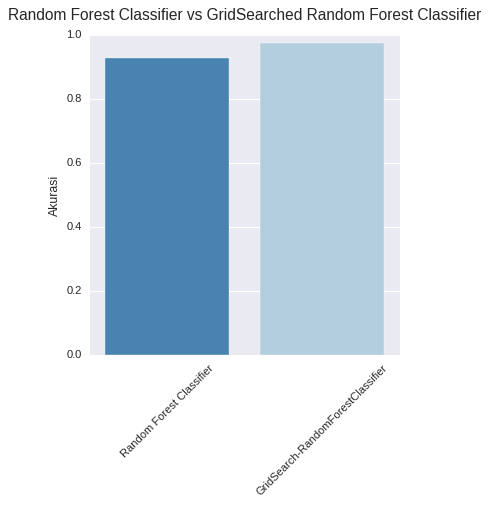

In [ ]:
# Membandingkan hasil sebelum dan sesudah perbaikan dalam Random Forest Classifier
plt.style.use("seaborn")

# Nama-nama model dan akurasi model setelah perbaikan
x = ["Random Forest Classifier",
     "GridSearch-RandomForestClassifier"]

y = [RandomForestClassifierScore,
     grid_search_rfc.best_score_]

# Membuat plot batang menggunakan seaborn barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");

# Menambahkan label sumbu-y
plt.ylabel("Akurasi")

# Menambahkan label sumbu-x dan memutar mereka agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan judul plot
plt.title("Random Forest Classifier vs GridSearched Random Forest Classifier", fontsize=14, y=1.03);


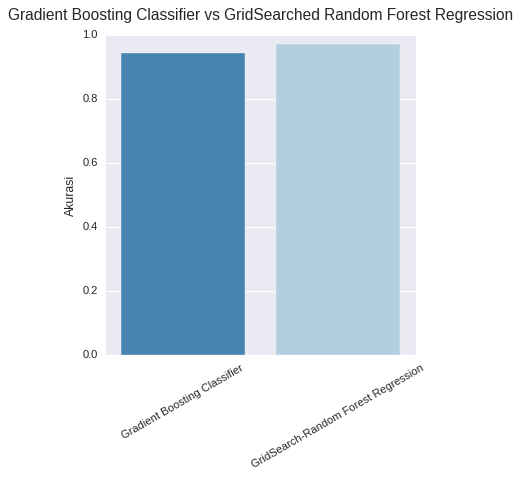

In [ ]:
# Membandingkan hasil antara GridSearch-Random Forest Regression dan Gradient Boosting Classifier
plt.style.use("seaborn")

# Nama-nama model dan akurasi model
x = ["Gradient Boosting Classifier",
     "GridSearch-Random Forest Regression"]

y = [GradientBoostingClassifierScore,
     grid_search_rfc.best_score_]

# Membuat plot batang menggunakan seaborn barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");

# Menambahkan label sumbu-y
plt.ylabel("Akurasi")

# Menambahkan label sumbu-x dan memutar mereka agar lebih mudah dibaca
plt.xticks(rotation=30)

# Menambahkan judul plot
plt.title("Gradient Boosting Classifier vs GridSearched Random Forest Regression", fontsize=14, y=1.03);


### After Hyperparameter tuning, the Random Forest Regression model performs better than the Gradient Boosting Classifier which was not the case before!

In [ ]:
# Mencetak laporan klasifikasi untuk model GridSearch-RandomForestRegression
print(metrics.classification_report(y_test, grid_search_rfc_predict))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        99
           1       1.00      0.62      0.77        24

    accuracy                           0.93       123
   macro avg       0.96      0.81      0.86       123
weighted avg       0.93      0.93      0.92       123



# SIMPAN MODEL


In [56]:
import pickle

In [57]:
import pickle

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
lr = LogisticRegression()
# Melatih model Logistic Regression menggunakan data latih
lr.fit(X_train, y_train)

# Menyimpan model Logistic Regression
filename_lr = 'logistic_regression_hepatitis_c.sav'
pickle.dump(lr, open(filename_lr, 'wb'))

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest Classifier
rfc = RandomForestClassifier()
# Melatih model Random Forest Classifier menggunakan data latih
rfc.fit(X_train, y_train)

# Menyimpan model Random Forest
filename_rfc = 'random_forest_hepatitis_c.sav'
pickle.dump(rfc, open(filename_rfc, 'wb'))

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Membuat objek model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
# Melatih model KNN menggunakan data latih
knn.fit(X_train, y_train)

# Menyimpan model K-Nearest Neighbors
filename_knn = 'knn_hepatitis_c.sav'
pickle.dump(knn, open(filename_knn, 'wb'))

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree Classifier
tree = DecisionTreeClassifier()
# Melatih model Decision Tree Classifier menggunakan data latih
tree.fit(X_train, y_train)

# Menyimpan model Decision Tree
filename_tree = 'decision_tree_hepatitis_c.sav'
pickle.dump(tree, open(filename_tree, 'wb'))

# CatBoost
from catboost import CatBoostClassifier

# Membuat objek model CatBoost Classifier dengan 10 iterasi
cat = CatBoostClassifier(iterations=10, silent=True)
# Melatih model CatBoost Classifier menggunakan data latih
cat.fit(X_train, y_train)

# Menyimpan model CatBoost
filename_cat = 'catboost_hepatitis_c.sav'
pickle.dump(cat, open(filename_cat, 'wb'))

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Membuat objek model Gradient Boosting Classifier
gb = GradientBoostingClassifier()
# Melatih model Gradient Boosting Classifier menggunakan data latih
gb.fit(X_train, y_train)

# Menyimpan model Gradient Boosting
filename_gb = 'gradient_boosting_hepatitis_c.sav'
pickle.dump(gb, open(filename_gb, 'wb'))
